In [1]:
import os
import importlib.util

# Define the path to config.py
config_path = os.path.abspath(os.path.join(os.path.dirname(r'C:\Users\nilay\OneDrive - Cal State Fullerton (1)\Desktop\NILAY-TO-JOB-DATA\SPRING 2024\CPSC 597 Project\Stock-Price-Prediction'), 'Stock-Price-Prediction', 'config.py'))

# Load the module from the specified path
spec = importlib.util.spec_from_file_location("config", config_path)
config = importlib.util.module_from_spec(spec)
spec.loader.exec_module(config)

c:\Users\nilay\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


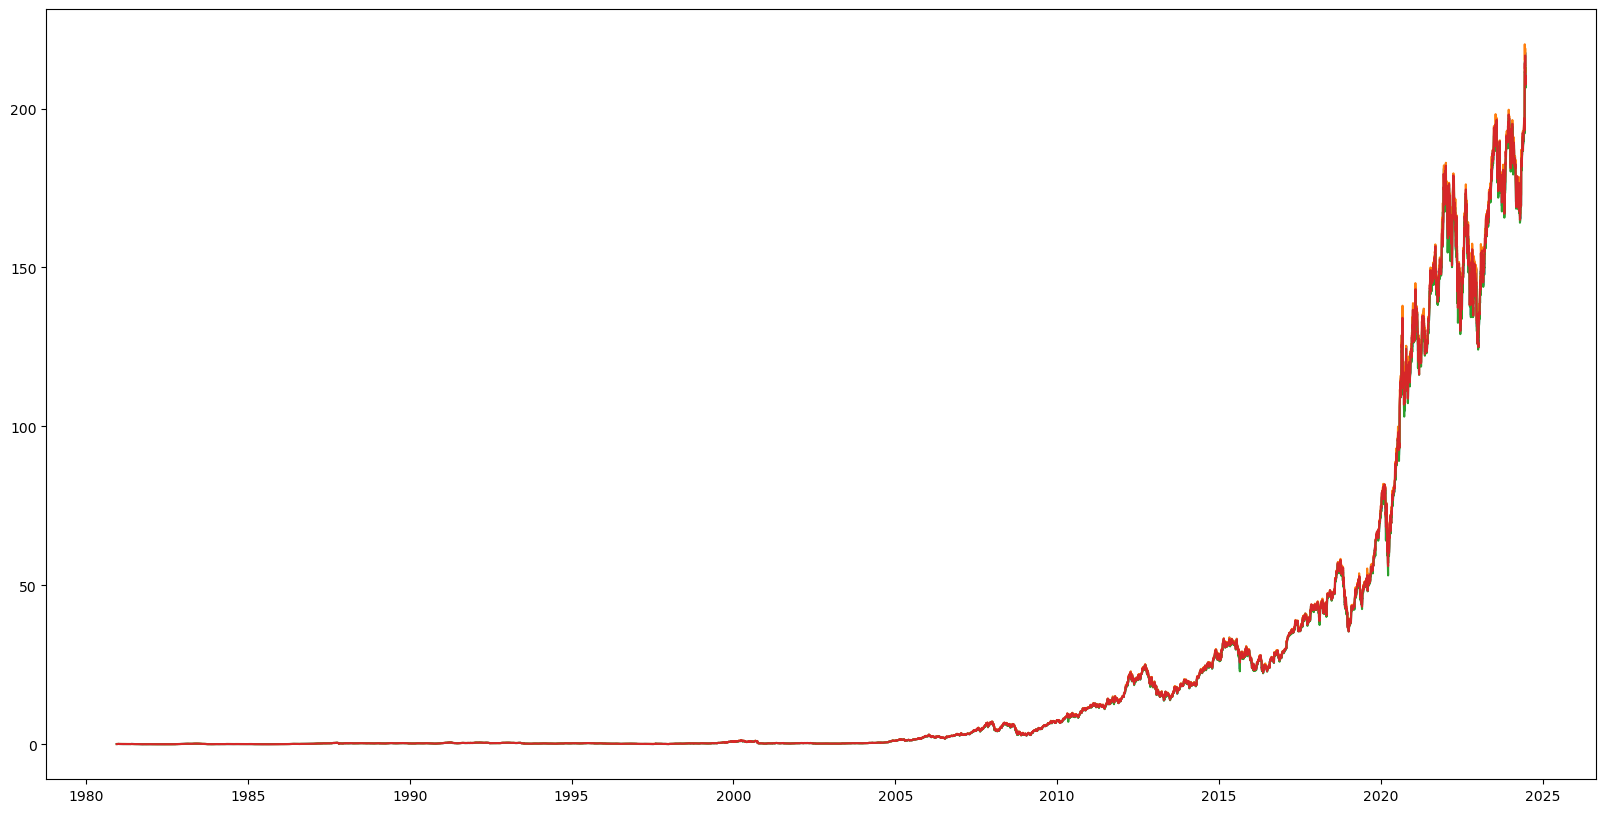

In [2]:
import pandas as pd

file_path = os.path.join(config.BASE_DIR, 'dataset', 'AAPL.csv')
df = pd.read_csv(file_path)
df = df[['Date', 'Open', 'High', 'Low', 'Close']]

# to convert date from string to datetime
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)

df.index = df.pop('Date')
# Assuming df is your DataFrame
df.dropna(axis=0, inplace=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['Open'])
plt.plot(df.index, df['High'])
plt.plot(df.index, df['Low'])
plt.plot(df.index, df['Close'])

In [3]:
## WINDOW FUNCTION
import pandas as pd
import numpy as np
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Function to create a windowed dataframe
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X_open, X_high, X_low, X_close, Y_open, Y_high, Y_low, Y_close = [], [], [], [], [], [], [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        open_values = df_subset['Open'].to_numpy()
        high_values = df_subset['High'].to_numpy()
        low_values = df_subset['Low'].to_numpy()
        close_values = df_subset['Close'].to_numpy()

        X_open.append(open_values[:-1])
        Y_open.append(open_values[-1])
        
        X_high.append(high_values[:-1])
        Y_high.append(high_values[-1])
        
        X_low.append(low_values[:-1])
        Y_low.append(low_values[-1])
        
        X_close.append(close_values[:-1])
        Y_close.append(close_values[-1])

        dates.append(target_date)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = map(int, next_date_str.split('-'))
        next_date = datetime.datetime(year=year, month=month, day=day)

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X_open = np.array(X_open)
    X_high = np.array(X_high)
    X_low = np.array(X_low)
    X_close = np.array(X_close)

    for i in range(n):
        ret_df[f'Open-{n-i}'] = X_open[:, i]
        ret_df[f'High-{n-i}'] = X_high[:, i]
        ret_df[f'Low-{n-i}'] = X_low[:, i]
        ret_df[f'Close-{n-i}'] = X_close[:, i]

    ret_df['Open-Target'] = Y_open
    ret_df['High-Target'] = Y_high
    ret_df['Low-Target'] = Y_low
    ret_df['Close-Target'] = Y_close

    return ret_df

# Start day second time around: 1990-01-02 -- 2006-12-29
windowed_df = df_to_windowed_df(df, 
                                '2016-01-04', 
                                '2024-06-25',
                                n=50)
windowed_df

C:\Users\nilay\AppData\Local\Temp\ipykernel_11188\3853324454.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Close-{n-i}'] = X_close[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_11188\3853324454.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Open-{n-i}'] = X_open[:, i]
C:\Users\nilay\AppData\Local\Temp\ipykernel_11188\3853324454.py:73: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

,Target Date,Open-50,High-50,Low-50,Close-50,Open-49,High-49,Low-49,Close-49,Open-48,...,Low-2,Close-2,Open-1,High-1,Low-1,Close-1,Open-Target,High-Target,Low-Target,Close-Target
0,2016-01-04,28.500000,28.895000,28.424999,28.440001,28.582500,28.875000,28.525000,28.875000,29.174999,...,26.795000,26.830000,26.752501,26.757500,26.205000,26.315001,25.652500,26.342501,25.500000,26.337500
1,2016-01-05,28.582500,28.875000,28.525000,28.875000,29.174999,29.807501,29.082500,29.770000,29.520000,...,26.205000,26.315001,25.652500,26.342501,25.500000,26.337500,26.437500,26.462500,25.602501,25.677500
2,2016-01-06,29.174999,29.807501,29.082500,29.770000,29.520000,29.532499,28.730000,28.820000,28.850000,...,25.500000,26.337500,26.437500,26.462500,25.602501,25.677500,25.139999,25.592501,24.967501,25.174999
3,2016-01-07,29.520000,29.532499,28.730000,28.820000,28.850000,29.135000,28.497499,28.637501,29.232500,...,25.602501,25.677500,25.139999,25.592501,24.967501,25.174999,24.670000,25.032499,24.107500,24.112499
4,2016-01-08,28.850000,29.135000,28.497499,28.637501,29.232500,29.825001,29.014999,29.817499,29.674999,...,24.967501,25.174999,24.670000,25.032499,24.107500,24.112499,24.637501,24.777500,24.190001,24.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,2024-06-18,169.029999,169.199997,168.240005,168.449997,168.699997,170.080002,168.350006,169.669998,168.800003,...,211.300003,212.490005,213.369995,218.949997,212.720001,216.669998,217.589996,218.630005,213.000000,214.289993
2129,2024-06-20,168.699997,170.080002,168.350006,169.669998,168.800003,169.089996,167.110001,167.779999,168.339996,...,212.720001,216.669998,217.589996,218.630005,213.000000,214.289993,213.929993,214.240005,208.850006,209.679993
2130,2024-06-21,168.800003,169.089996,167.110001,167.779999,168.339996,175.460007,168.160004,175.039993,174.259995,...,213.000000,214.289993,213.929993,214.240005,208.850006,209.679993,210.389999,211.889999,207.110001,207.490005
2131,2024-06-24,168.339996,175.460007,168.160004,175.039993,174.259995,178.360001,174.210007,176.550003,175.360001,...,208.850006,209.679993,210.389999,211.889999,207.110001,207.490005,207.720001,212.699997,206.589996,208.139999


In [4]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    # Extract the features (Open, High, Low, Close) from the columns
    middle_matrix = df_as_np[:, 1:-4]
    # Reshape the features matrix to include the multiple feature sets
    # Each row has n Open, High, Low, and Close values
    num_features = 4  # We have Open, High, Low, Close
    n = (middle_matrix.shape[1] // num_features)  # Number of time steps (n=3 in this case)
    X = middle_matrix.reshape((len(dates), n, num_features))

    # Extract the target values (Open-Target, High-Target, Low-Target, Close-Target)
    Y_open = df_as_np[:, -4]
    Y_high = df_as_np[:, -3]
    Y_low = df_as_np[:, -2]
    Y_close = df_as_np[:, -1]

    # Combine all target values into a single array
    Y = np.stack((Y_open, Y_high, Y_low, Y_close), axis=-1)

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2133,), (2133, 50, 4), (2133, 4))

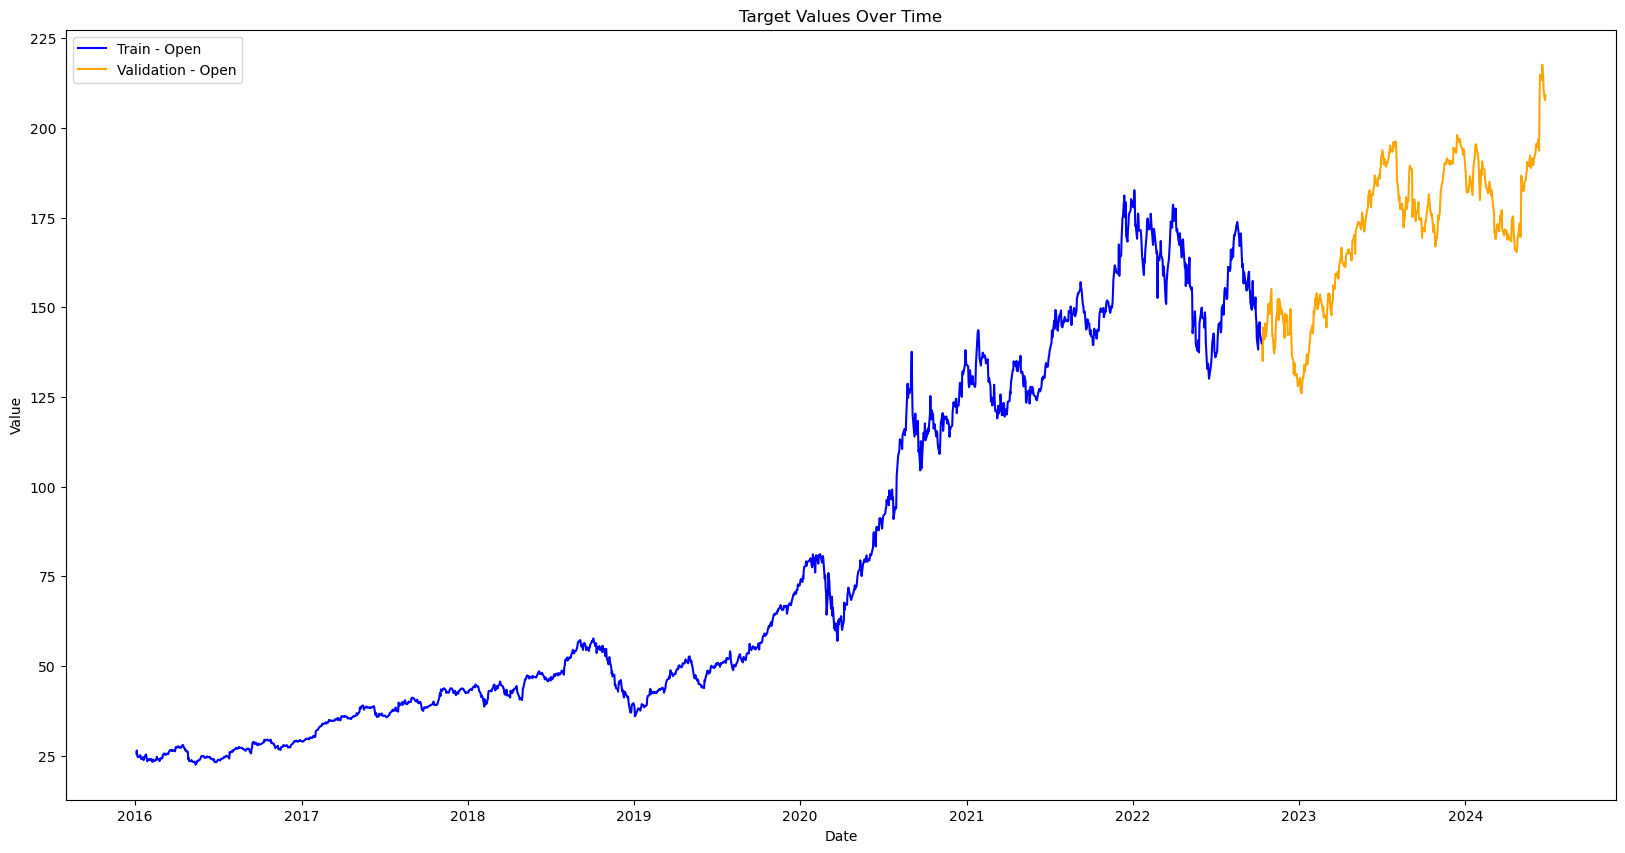

In [5]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .80)
q_90 = int(len(dates) * .90)

dates_train2, X_train2, y_train2 = dates[:q_80], X[:q_80], y[:q_80]
dates_val2, X_val2, y_val2 = dates[q_80:], X[q_80:], y[q_80:]
# dates_test2, X_test2, y_test2 = dates[q_90:], X[q_90:], y[q_90:]

plt.figure(figsize=(20, 10))

# Plotting target values for each feature set
plt.plot(dates_train2, y_train2[:, 0], label='Train - Open', color='blue')
plt.plot(dates_val2, y_val2[:, 0], label='Validation - Open', color='orange')
# plt.plot(dates_test2, y_test2[:, 0], label='Test - Open', color='green')

plt.legend()
plt.title('Target Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model_2 = Sequential([
    layers.Input((3, 4)),
    layers.LSTM(256),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4)
])

# Compile the model
model_2.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mean_absolute_error'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, 
                               restore_best_weights=True)

# Train the model with early stopping
model_2.fit(X_train2, y_train2, 
          validation_data=(X_val2, y_val2), 
          epochs=100, 
          callbacks=[early_stopping])


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - loss: 8461.7295 - mean_absolute_error: 77.8242 - val_loss: 29413.1973 - val_mean_absolute_error: 170.4078
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 8094.2388 - mean_absolute_error: 75.2841 - val_loss: 28476.8965 - val_mean_absolute_error: 167.6282
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 7173.1084 - mean_absolute_error: 69.5972 - val_loss: 25965.2031 - val_mean_absolute_error: 159.9206
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - loss: 6438.2998 - mean_absolute_error: 62.6553 - val_loss: 22216.0801 - val_mean_absolute_error: 147.6664
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 4690.7969 - mean_absolute_error: 49.0475 - val_loss: 18374.2090 - val_mean_absolute_error: 133.9604
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - loss: 3568.8589 - mean_absolute_error: 41.4220 - val_loss: 14946.9434 - val_mean_absolute_error: 120.4429
Epoch 7/100
54/54 ━━━━━━━━━━━━━

In [7]:
import pandas as pd
import datetime

# Redefine str_to_datetime function to handle different date formats if needed
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

# Convert the start date string to a datetime object using str_to_datetime
start_date_str = '2024-06-26'
start_date = str_to_datetime(start_date_str)

# Create a range of business days for the next 30 weekdays
dates_set_future_prediction = pd.date_range(start=start_date, periods=30, freq=pd.offsets.BDay())

# Print the array of timestamps
print(dates_set_future_prediction.shape)
dates_set_future_prediction

(30,)


DatetimeIndex(['2024-06-26', '2024-06-27', '2024-06-28', '2024-07-01',
               '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05',
               '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-11',
               '2024-07-12', '2024-07-15', '2024-07-16', '2024-07-17',
               '2024-07-18', '2024-07-19', '2024-07-22', '2024-07-23',
               '2024-07-24', '2024-07-25', '2024-07-26', '2024-07-29',
               '2024-07-30', '2024-07-31', '2024-08-01', '2024-08-02',
               '2024-08-05', '2024-08-06'],
              dtype='datetime64[ns]', freq='B')

In [8]:
# Initialize the input window with the last 50 days from X_val
input_window = X_val2[-50:, :, :]  # Shape (50, 50, 4)
print(input_window.shape)
print(input_window)

# Initialize an empty list to store the predictions
test_set_future_prediction = []

(50, 50, 4)
[[[183.99 186.95 183.82 186.86]
  [179.86 187.33 179.25 185.85]
  [188.15 189.25 185.84 187.68]
  ...
  [168.8  169.09 167.11 167.78]
  [168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]]

 [[179.86 187.33 179.25 185.85]
  [188.15 189.25 185.84 187.68]
  [186.86 189.31 186.77 189.3 ]
  ...
  [168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]
  [175.36 176.63 172.5  172.69]]

 [[188.15 189.25 185.84 187.68]
  [186.86 189.31 186.77 189.3 ]
  [190.64 191.05 188.61 189.41]
  ...
  [174.26 178.36 174.21 176.55]
  [175.36 176.63 172.5  172.69]
  [171.75 173.76 168.27 169.38]]

 ...

 [[168.8  169.09 167.11 167.78]
  [168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]
  ...
  [213.37 218.95 212.72 216.67]
  [217.59 218.63 213.   214.29]
  [213.93 214.24 208.85 209.68]]

 [[168.34 175.46 168.16 175.04]
  [174.26 178.36 174.21 176.55]
  [175.36 176.63 172.5  172.69]
  ...
  [217.59 218.63 213.   214.29]
  [213.93 214.24 208.85 209.68]
  [210.39 211.89

In [9]:
# Iterate over each date in the dates_set_future_prediction
for date in dates_set_future_prediction:
    # Ensure the input window has the shape (1, 50, 4) for the model
    current_input = input_window
    
    # Predict the next day's 'open', 'high', 'low', 'close'
    prediction = model_2.predict(current_input)
    
    # Store the prediction
    test_set_future_prediction.append(prediction[0])
    
    # Append the prediction to the input window and drop the oldest day
    input_window = np.append(input_window[1:], [prediction], axis=0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━

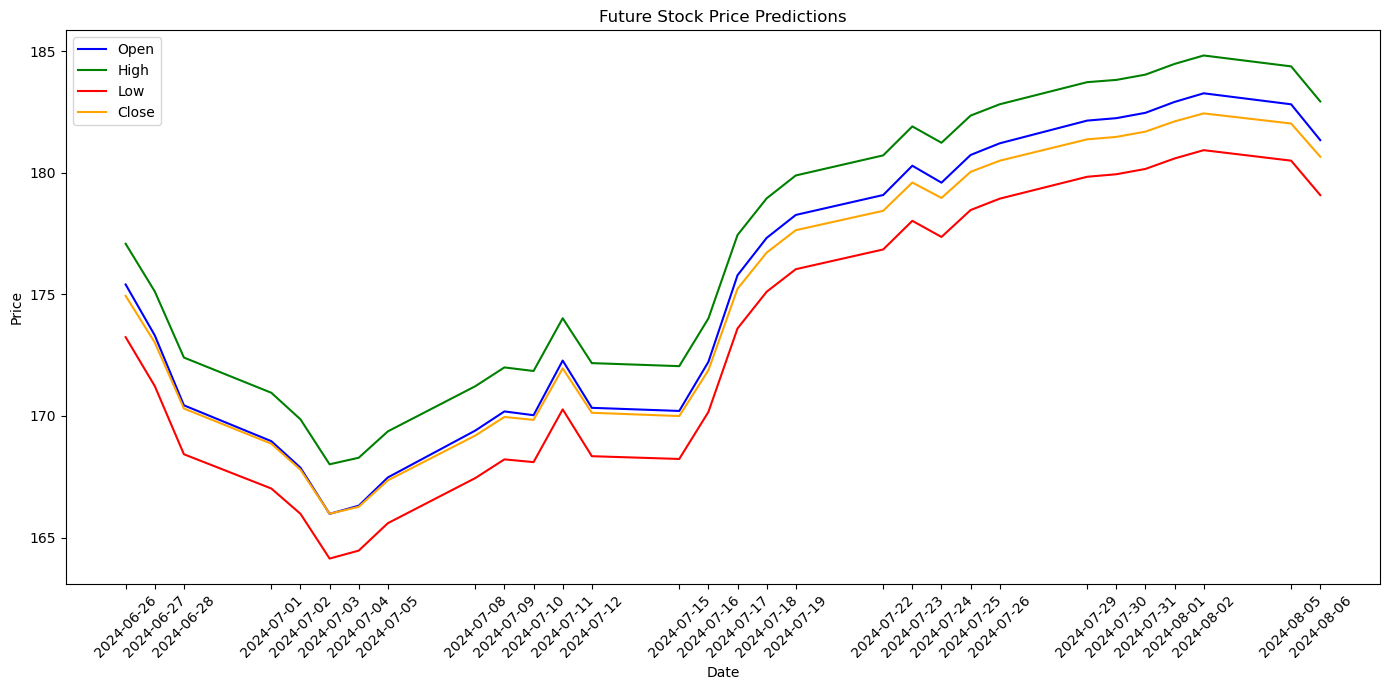

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming test_set_future_prediction and dates_set_future_prediction are already defined as in the provided details

# Convert test_set_future_prediction to a numpy array for easier manipulation
test_set_future_prediction = np.array(test_set_future_prediction)

# Extract Open, High, Low, and Close prices
open_prices = test_set_future_prediction[:, 0]
high_prices = test_set_future_prediction[:, 1]
low_prices = test_set_future_prediction[:, 2]
close_prices = test_set_future_prediction[:, 3]

# Plotting
plt.figure(figsize=(14, 7))

plt.plot(dates_set_future_prediction, open_prices, label='Open', color='blue')
plt.plot(dates_set_future_prediction, high_prices, label='High', color='green')
plt.plot(dates_set_future_prediction, low_prices, label='Low', color='red')
plt.plot(dates_set_future_prediction, close_prices, label='Close', color='orange')

# Adding title and labels
plt.title('Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Displaying all the dates on x-axis
plt.xticks(dates_set_future_prediction, rotation=45)
plt.tight_layout()

plt.show()